In [77]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
items = [4,7,8,9,6,5,2,3,1]
c = 12


# **First-Fit-Decreasing**

In [58]:
def heuristic_FFD(c,w):
  n = len(w)
  order = sorted([i for i in range(n)], key = lambda i:w[i],reverse=True)
  bin_for_item = [-1 for i in range(n)]
  bin_space = []
  for i in order:
    for j in range(len(bin_space)):
      if w[i]<bin_space[j]:
        bin_for_item[i]=j
        bin_space[j]-=w[i]
        break
    if bin_for_item[i] < 0:
      j = len(bin_space)
      bin_for_item[i] = j
      bin_space.append(c-w[i])
  n_bin = len(bin_space)
  return n_bin, bin_for_item

heuristic_FFD(c,items)  

(5, [2, 2, 1, 0, 3, 3, 0, 1, 4])

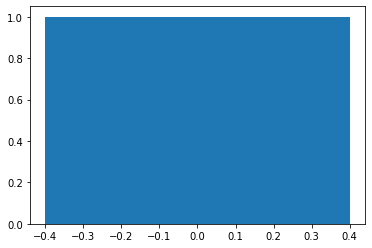

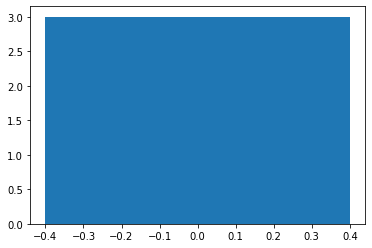

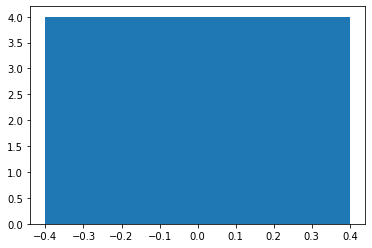

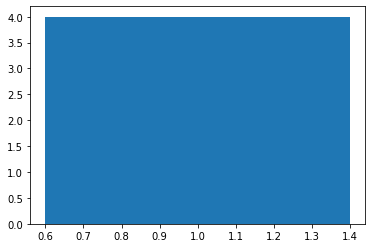

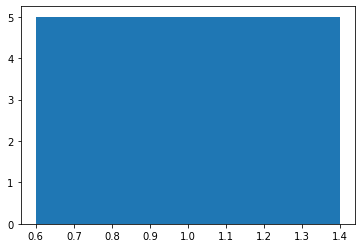

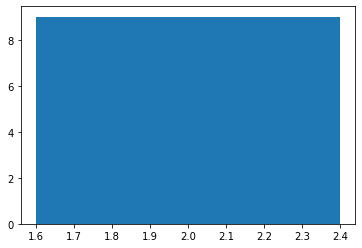

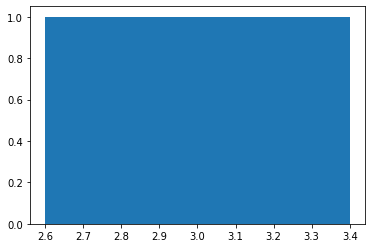

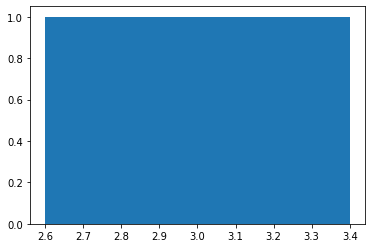

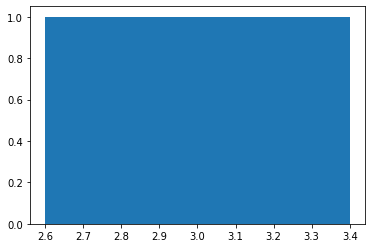

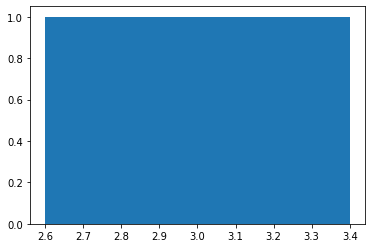

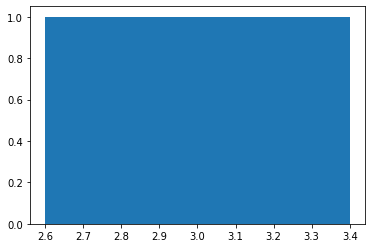

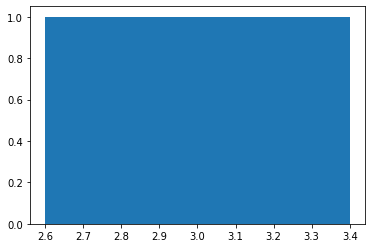

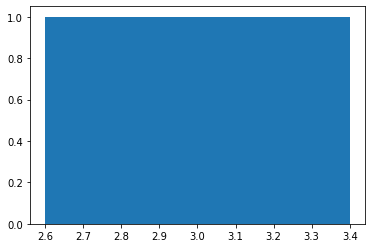

<Figure size 432x288 with 0 Axes>

In [88]:
# m,conf = heuristic_FFD(c,items)  
# labels = [i for i in range(m)]
# vals = [conf.count(v) for v in set(sorted(conf))]
# plt.bar(labels, vals, color=sns.color_palette())
# plt.show()

it = {
    0: [1,3,4],
    1: [4,5],
    2: [9],
    3: [1,1,1,1,1,1,1],
}

tmp = {}

for i in it:
  for j in it[i]:
    plt.bar(i,j, color=sns.color_palette())
    plt.show()
    plt.clf()


fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.bar(tmp.keys(), tmp.values()) 

for i in it:
    line1.set_ydata()
    fig.canvas.draw()
    fig.canvas.flush_events()    

# **First-Fit-Increasing**

In [59]:
def heuristic_FFI(c,w):
  n = len(w)
  order = sorted([i for i in range(n)],key = lambda i:w[i])
  bin_for_item = [-1 for i in range(n)]
  bin_space = []
  for i in order:
    for j in range(len(bin_space)):
      if w[i]<bin_space[j]:
        bin_for_item[i]=j
        bin_space[j]-=w[i]
        break
    if bin_for_item[i] < 0:
      j = len(bin_space)
      bin_for_item[i] = j
      bin_space.append(c-w[i])
  n_bin = len(bin_space)
  return n_bin, bin_for_item

heuristic_FFI(c,items)  

(5, [0, 2, 3, 4, 1, 1, 0, 0, 0])

# **Best-Fit**

In [60]:
def heuristic_BF(c,w):
  n = len(w)
  bin_for_item = [-1 for i in range(n)]
  bin_space = []
  for i,wi in enumerate(w):
    tmp = sorted(bin_space)
    k=0
    while len(tmp)!=0:
      #k = bin_space.index(min(bin_space))
      if wi < tmp[k]:
        j = bin_space.index(tmp[k])
        bin_for_item[i]=j
        bin_space[j]-=wi
        break
      else:
        k+=1
        if (k == len(bin_space)): break
      
    if bin_for_item[i] < 0:
      j = len(bin_space)
      bin_for_item[i] = j
      bin_space.append(c-wi)
  n_bin = len(bin_space)
  return n_bin, bin_for_item

heuristic_BF(c,items)    

(5, [0, 0, 1, 2, 3, 3, 2, 1, 4])

# **Worst-Fit**

In [61]:
def heuristic_WF(c,w):
  n = len(w)
  bin_for_item = [-1 for i in range(n)]
  bin_space = []
  for i,wi in enumerate(w):
    if (bin_space != []):
      k = bin_space.index(max(bin_space))
      if wi < bin_space[k]:
        bin_for_item[i]=k
        bin_space[k]-=wi
      
    if bin_for_item[i] < 0:
      j = len(bin_space)
      bin_for_item[i] = j
      bin_space.append(c-wi)
  n_bin = len(bin_space)
  return n_bin, bin_for_item

heuristic_WF(c,items)    

(5, [0, 0, 1, 2, 3, 3, 1, 4, 4])

# **Almost-Worst-Fit**

In [62]:
def heuristic_AWF(c,w):
  n = len(w)
  bin_for_item = [-1 for i in range(n)]
  bin_space = []
  for i,wi in enumerate(w):
    tmp = bin_space
    if (len(tmp)!=0):
      k = tmp.index(max(tmp)); tmp[k] = 0; k = tmp.index(max(tmp))
      if w[i]<bin_space[k]:
        bin_for_item[i]=k
        bin_space[k]-=wi
      
    if bin_for_item[i] < 0:
      j = len(bin_space)
      bin_for_item[i] = j
      bin_space.append(c-wi)
  n_bin = len(bin_space)
  return n_bin, bin_for_item

heuristic_AWF(c,items)    

(9, [0, 1, 2, 3, 4, 5, 6, 7, 8])

# **Next-Fit**

In [63]:
def heuristic_NF(c,w):
  n = len(w)
  bin_for_item = [-1 for i in range(n)]
  bin_space = []
  for i,wi in enumerate(w):
    for j in range(len(bin_space),0,-1):
      if wi<bin_space[j-1]:
        bin_for_item[i]=j-1
        bin_space[j-1]-=wi
        break
    if bin_for_item[i] < 0:
      j = len(bin_space)
      bin_for_item[i] = j
      bin_space.append(c-wi)
  n_bin = len(bin_space)
  return n_bin, bin_for_item

heuristic_NF(c,items)      

(5, [0, 0, 1, 2, 3, 3, 2, 1, 4])

# **BRANCH & BOUND**

**Representation de l'espace des solutions :**
on prend un liste qui designe pour chaque item le bin a qui il est affecté, on aura comme noeud racine [ -1 ... ].
(le num du bin au maximum peu atteindre n dans le pire cas) 


*stratégie en profondeur*:  les premiere solution sont les meilleur pas la peine de tout évaluer

**Fonction d'evaluation**

In [64]:
def eval(conf):
  return max(conf)+1

In [65]:
def verif(conf):
  en = enumerate(conf)
  bin = set(conf)
  for b in bin:
    indices = [index for index, element in enumerate(conf) if element == b]
    s = sum([items[i] for i in indices])
    if s > c: return 0
  #verifier que les numero des bins sont bien séquentiel partant de 0
  mx = max(conf)
  lis = [i for i in range(mx)] 
  for i in lis:
    if (i not in list(set(conf))): 
      return 0
  return 1 

In [66]:
n=len(items)
Confs=[]
Confs.append([-1]*n)
m, soluce = heuristic_FFD(c,items)
print(m, soluce)
j=0
while len(Confs)>0 :
  v = Confs.pop(0)
  ev = eval(v)
  if (ev < m):
    j = v.index(-1)
    for i in range(n,-1,-1):
      v = v.copy()
      if (j<n): v[j]=i 
      if -1 in v:
          Confs.insert(0,v)
      else:
        if (verif(v)==1):
          if eval(v) <= m:
            m = eval(v)
            opt = v
            print('Solution trouvé',m,v)
    j+=1  

print('Solution optimal: ',m,opt)
 

5 [2, 2, 1, 0, 3, 3, 0, 1, 4]
Solution trouvé 5 [0, 0, 1, 2, 3, 3, 1, 2, 4]
Solution trouvé 4 [0, 0, 1, 2, 3, 3, 1, 2, 3]
Solution trouvé 4 [0, 0, 1, 2, 3, 3, 1, 2, 1]
Solution trouvé 4 [0, 0, 1, 2, 3, 3, 1, 2, 0]
Solution optimal:  4 [0, 0, 1, 2, 3, 3, 1, 2, 0]


# **Recuit Simulé**

**Voisinage:** pour faire des mouvement on doit définir la notion de voisinage pour notre probleme, dans se cas un voisin et une affectation differente d'un seul item.

In [67]:
def voisins(conf,ind,max_bin):
  V = []
  for i in range(max_bin):
    if i!=conf[ind]:
      v = conf.copy()
      v[ind]=i
      if verif(v):
        V.append(v)
  return V    
    
voisins(soluce,2,5)

[[2, 2, 4, 0, 3, 3, 0, 1, 4]]

**Choix du meilleur voisin:** c'est celui qui contient un bin presque vide pour que le prochain voisin essaye de le vider 

In [68]:
def eval_choix(conf):
  bin = set(conf)
  bin_space = []
  for b in bin:
    indices = [index for index, element in enumerate(conf) if element == b]
    s = sum([items[i] for i in indices])
    bin_space.append(c-s)
  return max(bin_space) 


In [69]:
def choix(voisins):
  if len(voisins)>0:
    evals = [eval_choix(v) for v in voisins]
    choix = evals.index(max(evals))
    return voisins[choix],voisins
  return -1    

In [70]:
def RS(soluce,m,alpha,t,it_palier,k_arret):
  x = soluce; fx = eval_choix(x)
  optimum = soluce
  o = m
  k=0
  while True:
    for i in range(it_palier):
      j = random.randint(0,n-1)
      bv = choix(voisins(x,j,m))
      if bv == -1 : continue
      best, vois = bv
      #v= best;fv = eval_choix(v)
      v = random.choice(vois); fv = eval_choix(v)
      if eval(v) < eval(x) : 
        optimum = v
        o = eval(v)
        fv *= 10
        #k=k_arret-1
        #break
      delta = fv - fx
      if delta > 0:
        x = v
        if eval(x) < o:
          optimum = x
          o = eval(x)
      else:
        u=random.random()  
        if u < math.exp(delta / t):
          x = v
      t = alpha * t 
      if t == 0: 
        t=100
        break    
    k+=1   
    if k == k_arret :break
  return optimum, o

m,soluce = heuristic_FFD(c,items)
alpha = 0.94
t = 100
it_palier = 100
k_arret = 100

RS(soluce,m,alpha,t,it_palier,k_arret)

([0, 3, 2, 1, 0, 3, 0, 2, 1], 4)

# **Recherche Taboue**

In [71]:
def bon_voisins(conf,ind,max_bin,taboue):
  V = []
  for i in range(max_bin):
    if i!=conf[ind]:
      v = conf.copy()
      v[ind]=i
      if verif(v) and ((v not in taboue) or len(taboue)== 10 or eval(v) < max_bin):
        if len(taboue)== 10: taboue.pop()
        V.append(v)
  return V    
    
bon_voisins(soluce,2,5,[])

[[2, 2, 4, 0, 3, 3, 0, 1, 4]]

In [72]:
def RT(soluce,m,k_arret):
  x = soluce; fx = eval_choix(x)
  optimum = soluce
  o = m
  k=0
  Tabou = []
  while True:
    j = random.randint(0,n-1)
    bv = choix(bon_voisins(x,j,m,Tabou))
    if bv == -1 : continue
    best, vois = bv
    v= best;fv = eval_choix(v)
    if eval(v) < eval(x) : 
      fv *= 10
      # optimum = v
      # o = eval(v)
    # delta = fv - fx
    # if delta > 0:
    x = v
    Tabou.append(x)
    if eval(x) < o:
      optimum = x
      o = eval(x)
    
    k+=1   
    if k == k_arret :break
  return optimum, o

m,soluce = heuristic_FFD(c,items)
k_arret = 100

RT(soluce,m,k_arret)

([2, 2, 1, 0, 3, 3, 0, 1, 0], 4)